In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from visualize import contour_with_quiver
from visualize import contour_with_path
from visualize import surf
from visualize import contour


xmin, xmax, xstep = -4.0, 4.0, .25
ymin, ymax, ystep = -4.0, 4.0, .25

x, y = np. meshgrid(np.arange(xmin, xmax+xstep, xstep),
                    np.arange(ymin, ymax+ystep, ystep))

f = lambda x,y : (x-2)**2 + (y-2)**2
z = f(x,y)
minima = np.array([2.,2.])

f(*minima)

0.0

[2. 2.] [[2.]
 [2.]]


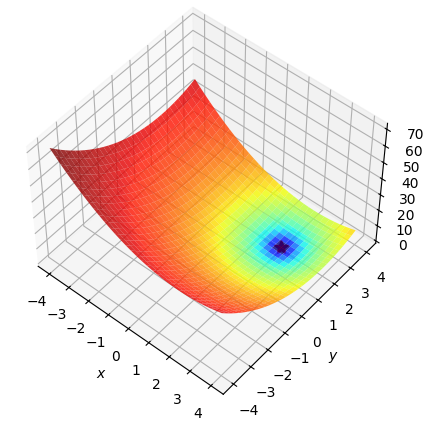

In [14]:
minima_ = minima.reshape(-1,1)
print(minima, minima_)
surf(f,x,y,minima=minima_)

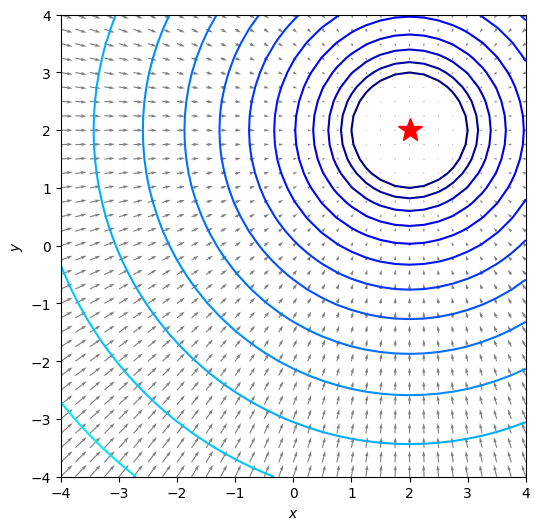

In [15]:
grad_f_x = lambda x, y: 2*(x-2)
grad_f_y = lambda x, y: 2*(y-2)

contour_with_quiver(f,x,y, grad_f_x, grad_f_y, minima=minima_)

In [16]:
def steepest_descent_twod(func,gradx, grady, x0,Maxiter=10, learning_rate=0.25,verbose=True):
    paths = [x0]
    fval_paths = [f(x0[0], x0[1])]
    for i in range(Maxiter):
        grad = np.array([grad_f_x(*x0), grad_f_y(*x0)])
        x1 = x0 - learning_rate*grad
        fval = f(*x1)
        if verbose:
            print(i, x1, fval)
        x0 = x1
        paths.append(x0)
        fval_paths.append(fval)
    paths = np.array(paths)
    paths = np.array(np.matrix(paths).T)
    fval_paths = np.array(fval_paths)
    return(x0, fval, paths, fval_paths)

0 [0. 0.] 8.0
1 [1. 1.] 2.0
2 [1.5 1.5] 0.5
3 [1.75 1.75] 0.125
4 [1.875 1.875] 0.03125
5 [1.9375 1.9375] 0.0078125
6 [1.96875 1.96875] 0.001953125
7 [1.984375 1.984375] 0.00048828125
8 [1.9921875 1.9921875] 0.0001220703125
9 [1.99609375 1.99609375] 3.0517578125e-05


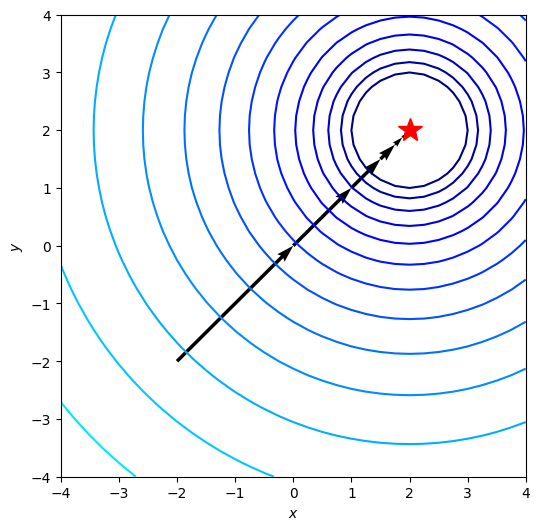

In [17]:
x0 = np.array([-2., -2.])
xopt, fopt, paths, fval_paths = steepest_descent_twod(f, grad_f_x, grad_f_y, x0)
contour_with_path(f,x,y,paths, minima=np.array([[2],[2]]))

In [18]:
import numpy as np
import matplotlib.pylab as plt

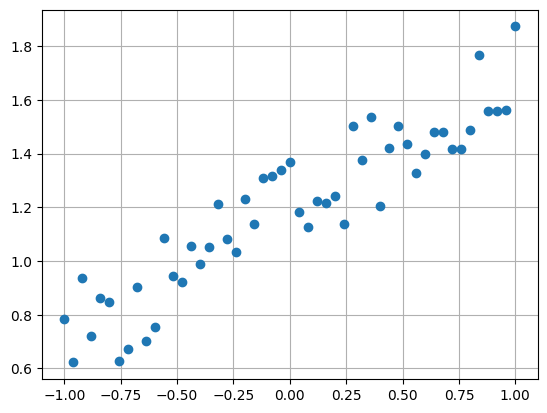

In [19]:
np.random.seed(320)
x_train = np.linspace(-1,1,51)
f = lambda x: 0.5 * x + 1.0
y_train = f(x_train) + 0.4 * np.random.rand(len(x_train))
plt.plot(x_train, y_train,'o')
plt.grid()
plt.show()       

In [20]:
np.random.seed(303)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
x_train = x_train[shuffled_id]
y_train = y_train[shuffled_id]

def loss(w, x_set, y_set):
    N = len(x_set)
    val = 0.0
    for i in range(len(x_set)):
        val += 0.5*(w[0]*x_set[i] + w[1] - y_set[i])**2
    return val/N

def loss_grad(w, x_set, y_set):
    N = len(x_set)
    val = np.zeros(len(w))
    for i in range(len(x_set)):
        er = w[0]*x_set[i]+ w[1]*y_set[i]
        val += er*np.array([x_set[i], 1.0])
    return val/N

def generate_batches(batch_size, features, labels):
    assert len(features) == len(labels)
    outout_batches=[]    
    sample_size = len(features)
    for start_i in range(0, sample_size, batch_size):
        end_i = start_i + batch_size
        batch = [features[start_i:end_i], labels[start_i:end_i]]
        outout_batches.append(batch)
    return outout_batches

In [21]:
batch_size = 10
lr = 0.01
MaxEpochs = 51

alpha = .9

In [22]:
w0 = np.array([4.0,-1.0])
path_sgd = []
for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_sgd.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        w1 = w0 - lr * grad
        w0 = w1

0 [ 4. -1.] 4.579314993864028
10 [ 3.36054008 -0.42622207] 2.7721680881629736
20 [ 2.80831554 -0.1549585 ] 1.8681057443686164
30 [ 2.33954761 -0.03074509] 1.3657459514609525
40 [1.94546494 0.02265045] 1.0728203417434488
50 [1.61601671 0.04249722] 0.89970740253515


In [23]:
wO = np.array([4.0,-1.0])
path_mm = []
velocity = np.zeros_like(w0)
for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_mm.append(wO)
        grad = loss_grad(wO, x_batch, y_batch)
        velocity = alpha + velocity - lr + grad
        w1 = w0 + velocity
        w0 = w1

0 [1.58624577 0.04343723] 0.8869193900226273
10 [3739.32113087 -849.5007446 ] 2784873.5510204793
20 [14761.59451611 -3339.9791421 ] 43349475.88854624
30 [33068.4064015  -7471.39175527] 217457803.37429887
40 [ 58659.75678703 -13243.73858411] 684138927.9900426
50 [ 91535.64567271 -20657.01962861] 1665686998.224505


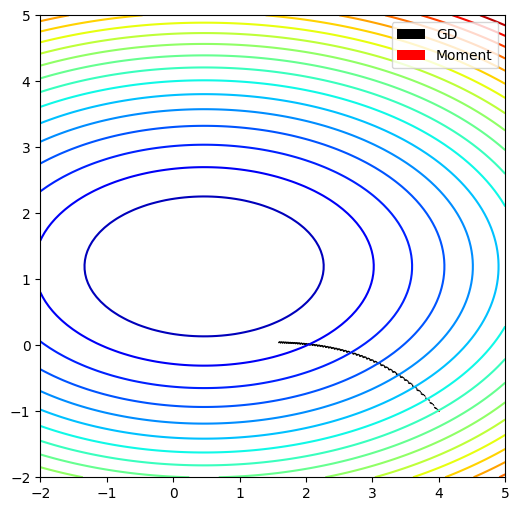

In [25]:
W0 = np.linspace(-2,5,101)
W1 = np.linspace(-2,5,101)
W0, W1 = np.meshgrid(W0,W1)
LOSSW = W0 * 0
for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        wij = np.array([W0[i,j],W1[i,j]])
        LOSSW[i,j] = loss(wij, x_train, y_train)

fig, ax = plt.subplots(figsize = (6,6))

ax.contour(W0,W1, LOSSW, cmap=plt.cm.jet,levels=np.linspace(0,max(LOSSW.flatten()),20))

paths = path_sgd
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1], paths[1,:-1],paths[0,1:]-paths[0,:-1],paths[1,1:]-paths[1,:-1],scale_units='xy', angles='xy', scale= 1, color='k')

paths = path_mm
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1], paths[1,:-1],paths[0,1:]-paths[0,:-1],paths[1,1:]-paths[1,:-1],scale_units='xy', angles='xy', scale= 1, color='r')

plt.legend(['GD','Moment'])
plt.show()